In [ ]:
## 1. 기계학습(50점)
# 1.1-데이터-탐색
# (1) 시각화 포함 탐색적 데이터 자료분석 시행
# (2) 이상치를 식별하고 처리
# (3) 앞선-두-단계에서-얻은-향후-분석시-고려사항-작성
# 1.2-클래스-불균형을-처리하시오
# 1.2.1.-업-샘플링-과정-설명하고-결과-작성
# 1.2.2 언더 샘플링 과정 설명하고 결과-작성
# 1.2.3-둘-중-선택하고-이유-설명
# 1.3. 모델링 하시오
# 1.3.1.-최소-3개-이상-알고리즘-제시하고-정확도-측면의-모델-1개와-속도-측면의-모델-1개를-꼭-구현(총-2개-이상)
# 1.3.2. 모델 비교하고 결과 설명
# 1.3.3. 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성 -->

In [1]:
# 1.1-데이터-탐색
import pandas as pd
import numpy as np

df01 = pd.read_csv("C:/adp/data/diabetes_for_test.csv")
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# (1) 시각화 포함 탐색적 데이터 자료분석 시행
df01.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64

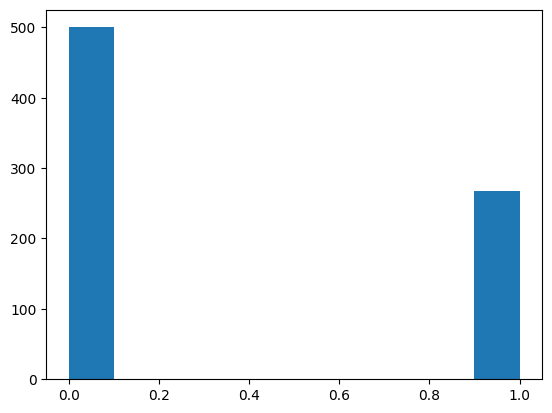

In [20]:
plt.hist(df01.Outcome)
df01['Outcome'].value_counts()
# Outcome 당뇨병유무는 500, 268건으로 나타남.

In [16]:
# 당뇨병 유무로 구분
df02_0 = df01[df01['Outcome'] == 0]
df02_1 = df01[df01['Outcome'] == 1]

In [17]:
df02_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,75.704504,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,999.000000,0.0


In [18]:
df02_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [ ]:
# 당뇨병있는 환자가 모든 수치가 높음. 나이는 비슷함

In [ ]:
# plt.hist(df01.Age)
df01['Age'].value_counts()
# 나이에 999살이 존재하여 이상치 처리 필요

In [22]:
df01.corr()
# 독립변수간 높은 상관관계를 가지는 변수는 없어서 모든 변수를 활용하여 모델링 활용 가능
# Outcome에 Glucose가 0.46으로 가장 높은 양의 상관관계를 보임

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.155438,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.019351,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.059801,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.071694,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.050300,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,-0.097307,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,-0.014469,0.173844
Age,0.155438,0.019351,0.059801,-0.071694,-0.050300,-0.097307,-0.014469,1.000000,0.001034
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.001034,1.000000


In [2]:
# (2) 이상치를 식별하고 처리
# 나이 999 삭제
df11 = df01[df01['Age'] != 999]

In [3]:
# Glucose, BloodPressure 0인 Case KNN으로 대체
# df11['Pregnancies'] = df11[df11['Pregnancies'] == 0].replace(0, np.nan)
df11['Glucose'] = df11['Pregnancies'].replace(0, np.nan)
df11['BloodPressure'] = df11['BloodPressure'].replace(0, np.nan)
print(df11['Glucose'].isna().sum())
print(df11['BloodPressure'].isna().sum())

111
35


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
df11_fill_columns = ['Glucose', 'BloodPressure']
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df11_knnim = imputer.fit_transform(df11[df11_fill_columns])
df11[df11_fill_columns] = df11_knnim

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [5]:
print(df11['Glucose'].isna().sum())
print(df11['BloodPressure'].isna().sum())

0
0


In [6]:
## (3) 앞선 두 단계에서 발견한 향후 분석시에 고려해야 할 사항을 작성하시오.
# 최대값과 최소값의 차이가 많이 나는 컬럼이 존재한다. 따라서 선형모델 사용시, scale을 적용할 필요가 있어 보임.

In [ ]:
# 1.2-클래스-불균형을-처리하시오
# 1.2.1.-업-샘플링-과정-설명하고-결과-작성
# 1.2.2 언더 샘플링 과정 설명하고 결과-작성
# 1.2.3-둘-중-선택하고-이유-설명

In [15]:
## 1.2.1.-업-샘플링-과정-설명하고-결과-작성
# 랜덤오버샘플링과 smote 샘플링이 있으며 근접값으로 데이터를 대체해주는 smote를 활용한다.
# 오버샘플링과 언더샘플링 중에서는 언더 샘플림은 샘플을 삭제하는 과정에서 데이터 손실이 발생하므로 주로 오버샘플링을 사용한다.
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler
X = df11.drop(['Outcome'], axis = 1)
y = df11[['Outcome']]

ros = RandomOverSampler()
X_upsampling, y_upsampling = ros.fit_resample(X, y)

In [17]:
print('기존의 타깃 분포')
print( df11[['Outcome']].value_counts() )
print('upsampling 타깃 분포')
print( y_upsampling.value_counts() )

기존의 타깃 분포
Outcome
0          497
1          268
dtype: int64
upsampling 타깃 분포
Outcome
0          497
1          497
dtype: int64


In [22]:
# 1.2.2 언더 샘플링 과정 설명하고 결과-작성
# Undersampling은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식으로, 대표적으로 random으로 다수의 클래스의 데이터를 선택하여 삭제하는 RndomUnderSampler, 
# 서로 다른 클래스가 있을때 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 코멕 링크 중 다수 클래스의 데이터를 제거하는 토멕링크방식이 있다.
# 시간상 문제로 Random Undersampling 사용한다.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_undersampling, y_undersampling = rus.fit_resample(X, y)

In [23]:
print('기존의 타깃 분포')
print( df11[['Outcome']].value_counts() )
print('upsampling 타깃 분포')
print( y_undersampling.value_counts() )

기존의 타깃 분포
Outcome
0          497
1          268
dtype: int64
upsampling 타깃 분포
Outcome
0          268
1          268
dtype: int64


In [24]:
## (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오.
# 당뇨병 환자 데이터는 268개로 데이터를 분석하기에는 다소 작은 숫자이다. 데이터의 손실을 최소화하고자 OverSmapling 기법을 사용한다.
# 더불어, UnderSample을 사용시 데이터가 작아서 오버피팅이 발생할 위험성이 있다.

SyntaxError: invalid syntax (1670521775.py, line 2)

In [ ]:
## 1.3. 모델링 하시오
# 1.3.1.-최소-3개-이상-알고리즘-제시하고-정확도-측면의-모델-1개와-속도-측면의-모델-1개를-꼭-구현(총-2개-이상)
# 1.3.2. 모델 비교하고 결과 설명
# 1.3.3. 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성 -->

In [68]:
# Train, Test 데이터를 7:3으로 비교
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_upsampling, y_upsampling, test_size = 0.3, stratify=y_upsampling['Outcome'], random_state=2020)

In [69]:
# 정규분포로 Scaling
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()

sscaler.fit(X_train)
X_train_sc = sscaler.transform(X_train)
X_test_sc = sscaler.transform(X_test)

In [70]:
## 1.3.1.-최소-3개-이상-알고리즘-제시하고-정확도-측면의-모델-1개와-속도-측면의-모델-1개를-꼭-구현(총-2개-이상)
# 로지스틱 회귀분석, xgb, svb으로 분석하고 비교함.

In [96]:
## (1) 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
import time
log = LogisticRegression()
start = time.time()
log.fit(X_train_sc, y_train)
end = time.time()
log_result = log.predict(X_test_sc)
print(end - start)

0.012686729431152344


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(log_result, y_test)

0.705685618729097

In [73]:
## (2) xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(randomstate = 2021)
start = time.time()
xgb.fit(X_train_sc, y_train)
end = time.time()
xgb_result = xgb.predict(X_test_sc)
print(end - start)

[14:30:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.15586280822753906


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(xgb_result, y_test)

0.7759197324414716

In [75]:
## (3) svm
import sklearn.svm as svm
svm_clf = svm.SVC(kernel = 'linear')
start = time.time()
svm_clf.fit(X_train_sc, y_train)
end = time.time()
svm_clf_result = svm_clf.predict(X_test_sc)
print(end - start)

0.06688690185546875


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(svm_clf_result, y_test)

0.7190635451505016

In [77]:
## 1.3.2. 모델 비교하고 결과 설명
# LogisticRegression 기법이 0.009s로 가장 빨랐고 xgb기법이 0.15s 가장 느렸다.
# xgb 분석의 정확도가 0.776으로 가장 높음

In [109]:
## 1.3.3. 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성 -->
# 속도 개선을 위한 차원축소방법인 PCA를 사용할 수 있다. 예측의 성능은 원본의 데이터를 그대로 사용하는 것보다 떨어질 수 있지만, 차원을 축소함으로써 예측의 속도는 훨씬 상승시킬 수 있다.
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_sc)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())
# 5개의 주성분으로 0.859 설명항 수 잇음

X_test_pca = pca.transform(X_test_sc)

[0.30822328 0.22670582 0.12484436 0.11070824 0.08921506 0.06444116
 0.06151746 0.01434463]
0.8596967566610147


In [110]:
# (2) 로지스틱 회귀분석
start = time.time()
log.fit(X_train_pca, y_train)
end = time.time()
log_result = log.predict(X_test_pca)
print(end - start)

0.004982471466064453


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(log_result, y_test)

0.705685618729097

In [113]:
# (3) xgb
# from xgboost import XGBClassifier
xgb = XGBClassifier(randomstate = 2021)
start = time.time()
xgb.fit(X_train_pca, y_train)
end = time.time()
xgb_result = xgb.predict(X_test_pca)
print(end - start)

[14:49:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.22048687934875488


In [116]:
# from sklearn.metrics import accuracy_score
accuracy_score(xgb_result, y_test)

0.7926421404682275

In [118]:
## (4) svm
# import sklearn.svm as svm
svm_clf = svm.SVC(kernel = 'linear')
start = time.time()
svm_clf.fit(X_train_pca, y_train)
end = time.time()
svm_clf_result = svm_clf.predict(X_test_pca)
print(end - start)

0.05341386795043945


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
# from sklearn.metrics import accuracy_score
accuracy_score(svm_clf_result, y_test)

0.7190635451505016

In [ ]:
# 예측 성능은 다소 감소하였지만, 속도 측면에서 차원축소에 의해 더 빨라졌다. 
# 향후 데이터가 크게 늘어나면 차원 축소를 통해 성능 및 속도 측면에서 더 유의미한 결과를 찾아낼 수 있을것이다.